In [51]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [52]:
data_0 = pd.read_csv('data/xterrae_data_0', index_col=False,)
data_1 = pd.read_csv('data/xterrae_data_1', index_col=False)
data_0 = data_0.drop(columns='Unnamed: 0')
data_1 = data_1.drop(columns='Unnamed: 0')

In [53]:
final_df = pd.concat([data_0,data_1], axis=0)

In [54]:
final_df.columns

Index(['Longitud', 'Latitud', 'PIRange_Bulkd.0-5cm.tif',
       'PIRange_Bulkd.100-200cm.tif', 'PIRange_Bulkd.15-30cm.tif',
       'PIRange_Bulkd.30-60cm.tif', 'PIRange_Bulkd.5-15cm.tif',
       'PIRange_Bulkd.60-100cm.tif', 'PIRange_Clay.0-5cm.tif',
       'PIRange_Clay.100-200cm.tif',
       ...
       'Silt.15-30cm.tif', 'Silt.30-60cm.tif', 'Silt.5-15cm.tif',
       'Silt.60-100cm.tif', 'Tex_Class.0-5cm.tif', 'Tex_Class.100-200cm.tif',
       'Tex_Class.15-30cm.tif', 'Tex_Class.30-60cm.tif',
       'Tex_Class.5-15cm.tif', 'Tex_Class.60-100cm.tif'],
      dtype='object', length=135)

In [55]:
def clasificar_region(latitud, longitud):
    if -40.0 <= latitud <= -39.0 and -73.5 <= longitud <= -71.5:
        return "Los Ríos"
    elif -44.0 <= latitud <= -40.0 and -74.5 <= longitud <= -71.5:
        return "Los Lagos"
    elif -38.5 <= latitud <= -36.0 and -73.5 <= longitud <= -71.5:
        return "Biobío"
    elif -39.0 <= latitud <= -38.5 and -73.0 <= longitud <= -71.0:
        return "Araucanía"
    else:
        return "Fuera de las regiones especificadas"

# Suponiendo que el DataFrame tiene columnas 'latitud' y 'longitud'
def clasificar_regiones_df(df):
    df['Región'] = df.apply(lambda row: clasificar_region(row['Latitud'], row['Longitud']), axis=1)
    return df

# Ejemplo de uso:
# data = {'latitud': [-39.5, -37.0, -41.0], 'longitud': [-72.5, -72.0, -73.0]}
# df = pd.DataFrame(data)
# df = clasificar_regiones_df(df)
# print(df)

data = pd.DataFrame()
data['Latitud'] = final_df['Latitud']
data['Longitud'] = final_df['Longitud']

df = pd.DataFrame(data)
df = clasificar_regiones_df(df=df
                            )




In [56]:
df['Región'].value_counts()

Región
Los Ríos                               1600
Los Lagos                              1044
Fuera de las regiones especificadas     114
Araucanía                                10
Name: count, dtype: int64

In [57]:
regiones = pd.read_csv('regiones.csv')

In [58]:
import seaborn as sns  
import matplotlib.pyplot as plt  

def graficar_frecuencia_variable_categorica(dataframe, columna):
    # Contar las ocurrencias de cada categoría en la columna
    conteo = dataframe[columna].value_counts()
    
    # Crear la gráfica de barras
    plt.figure(figsize=(6, 5))
    ax = conteo.plot(kind='bar', color='gray', edgecolor='black', width=0.9)
    
    # Mostrar el número encima de cada barra
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    # Personalización del gráfico
    plt.title(f'Frecuencia de Regiones')
    plt.xlabel(f'{columna}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

In [59]:
final = pd.DataFrame()
final['Región'] = pd.concat([df['Región'], regiones['Región']])

In [60]:
final = final.loc[final['Región'] != 'Fuera de las regiones especificadas']

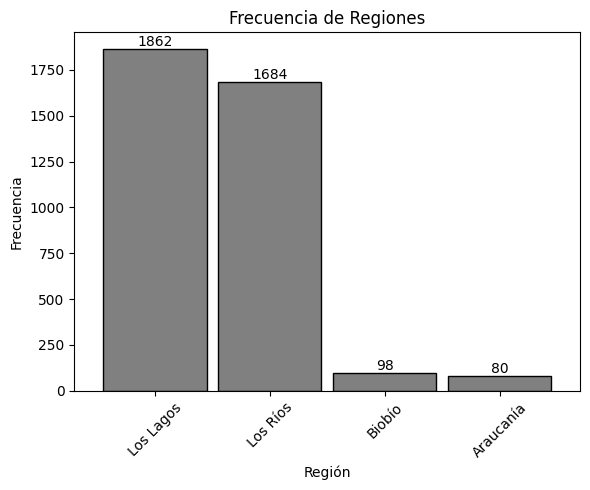

In [61]:
graficar_frecuencia_variable_categorica(final, 'Región')

In [50]:
1679+1565+74+70

3388